<p style="text-align:center">
    <a href="https://skills.network/?utm_medium=Exinfluencer&utm_source=Exinfluencer&utm_content=000026UJ&utm_term=10006555&utm_id=NA-SkillsNetwork-Channel-SkillsNetworkCoursesIBMDeveloperSkillsNetworkST0151ENSkillsNetwork20531532-2022-01-01" target="_blank">
    <img src="https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/assets/logos/SN_web_lightmode.png" width="200" alt="Skills Network Logo"  />
    </a>
</p>



#### Import the required libraries we need for the lab.


In [39]:
import piplite
await piplite.install(['numpy'],['pandas'])
await piplite.install(['seaborn'])

In [40]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()
from scipy.stats import norm
import scipy.stats as stats
from math import sqrt
import statsmodels.api as sm
from statsmodels.formula.api import ols
from scipy.stats import f_oneway

#### Read the dataset in the csv file from the URL


In [41]:
from js import fetch
import io

URL = 'https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBMDeveloperSkillsNetwork-ST0151EN-SkillsNetwork/labs/boston_housing.csv'
resp = await fetch(URL)
boston_url = io.BytesIO((await resp.arrayBuffer()).to_py())

In [42]:
Viviendas=pd.read_csv(boston_url)

#### Add your code below following the instructions given in the course to complete the peer graded assignment


In [43]:
Viviendas.head()

,Unnamed: 0,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,LSTAT,MEDV
0,0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,4.98,24.0
1,1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,9.14,21.6
2,2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,4.03,34.7
3,3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,2.94,33.4
4,4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,5.33,36.2


### The following describes the dataset variables:

·      CRIM - per capita crime rate by town

·      ZN - proportion of residential land zoned for lots over 25,000 sq.ft.

·      INDUS - proportion of non-retail business acres per town.

·      CHAS - Charles River dummy variable (1 if tract bounds river; 0 otherwise)

·      NOX - nitric oxides concentration (parts per 10 million)

·      RM - average number of rooms per dwelling

·      AGE - proportion of owner-occupied units built prior to 1940

·      DIS - weighted distances to five Boston employment centres

·      RAD - index of accessibility to radial highways

·      TAX - full-value property-tax rate per $10,000

·      PTRATIO - pupil-teacher ratio by town

·      LSTAT - % lower status of the population

·      MEDV - Median value of owner-occupied homes in $1000's

### TASK 2: Generate Descriptive Statistics and Visualizations

### Question 1: 
### For the "Median value of owner-occupied homes" provide a boxplot

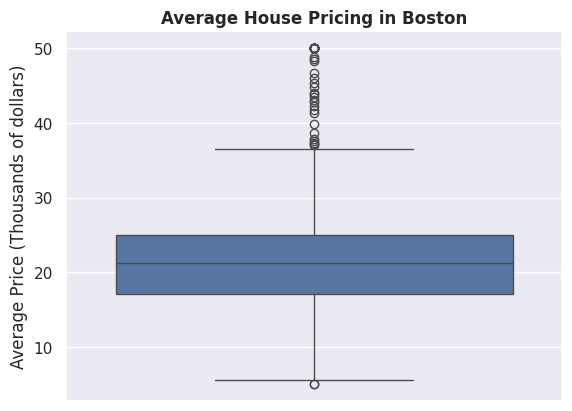

In [45]:
Boxplot = sns.boxplot(y= 'MEDV', data= Viviendas)
Boxplot.set_title('Average House Pricing in Boston', weight='bold')
plt.ylabel('Average Price (Thousands of dollars)')
plt.show()

### Question 2: 
### Provide a  bar plot for the Charles river variable

Text(0.5, 35.99999999999997, 'House near Charles River (1 Represents "yes")')

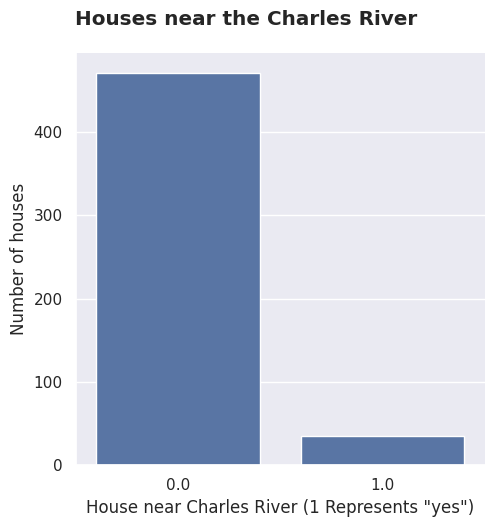

In [51]:
BarChart= sns.catplot(x='CHAS', data= Viviendas, kind= 'count')
BarChart.fig.suptitle('Houses near the Charles River', weight='bold', y=1.05)
plt.ylabel('Number of houses')
plt.xlabel('House near Charles River (1 Represents "yes")')

### Question 3: 
### Provide a boxplot for the MEDV variable vs the AGE variable. (Discretize the age variable into three groups of 35 years and younger, between 35 and 70 years and 70 years and older)

In [17]:
# We create Age Groups
Viviendas['Age_group'] = pd.cut(Viviendas['AGE'], 
                                 bins=[0, 35, 70, 100], 
                                 labels=['35 o menos', '35 a 70', '70 o más'])

Text(0.5, 1.0, 'Boxplot of Pricing by Age Group')

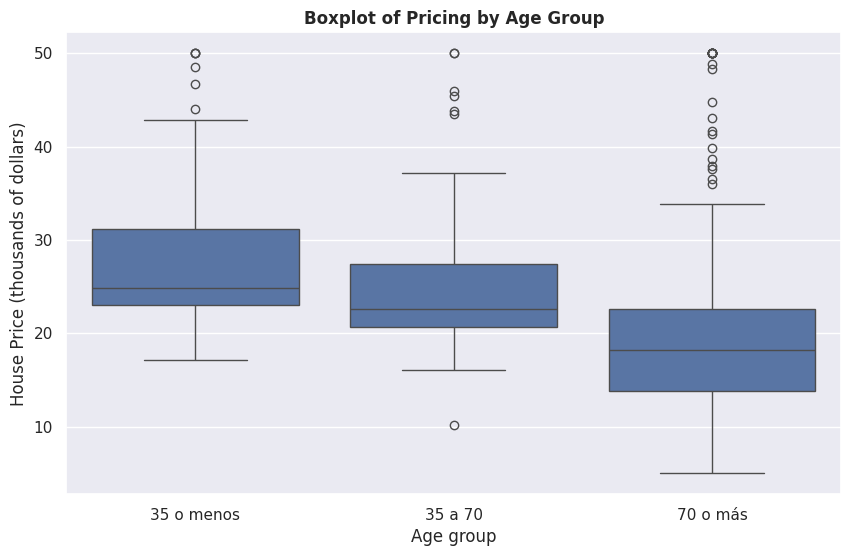

In [18]:
# Boxsplots 
plt.figure(figsize=(10, 6))
sns.boxplot(x='Age_group', y='MEDV', data=Viviendas)
plt.ylabel('House Price (thousands of dollars)')
plt.xlabel('Age group')
plt.title('Boxplot of Pricing by Age Group', weight= 'bold')

### Question 4:
### Provide a scatter plot to show the relationship between Nitric oxide concentrations and the proportion of non-retail business acres per town. What can you say about the relationship?

Text(0.5, -0.1, 'Conclusion: Generally, a higher proprtion of non-retail business acres per town produces a higher concentration of Nitric oxide.')

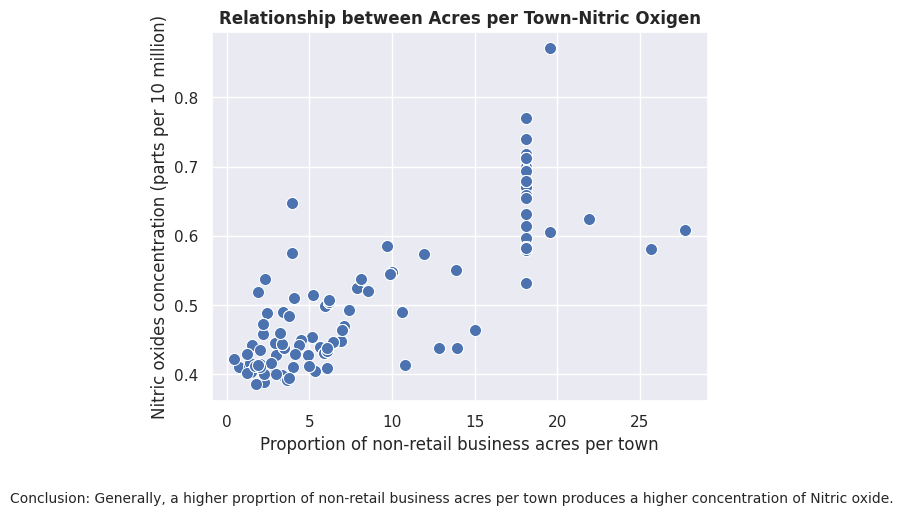

In [71]:
ScatterPlot = sns.scatterplot(x='INDUS', y='NOX', data=Viviendas, s=75)
plt.title('Relationship between Acres per Town-Nitric Oxigen', weight= 'bold')
plt.xlabel('Proportion of non-retail business acres per town')
plt.ylabel('Nitric oxides concentration (parts per 10 million)')
plt.figtext(0.5, -0.1, "Conclusion: Generally, a higher proprtion of non-retail business acres per town produces a higher concentration of Nitric oxide.", 
            ha="center", fontsize=10, wrap=True)

### Question 5: 
### Create a histogram for the pupil to teacher ratio variable

Text(0.5, -0.1, 'Conclusion: The histogram shows the distribution of pupil-to-teacher ratios, \nindicating most values fall within a certain range.')

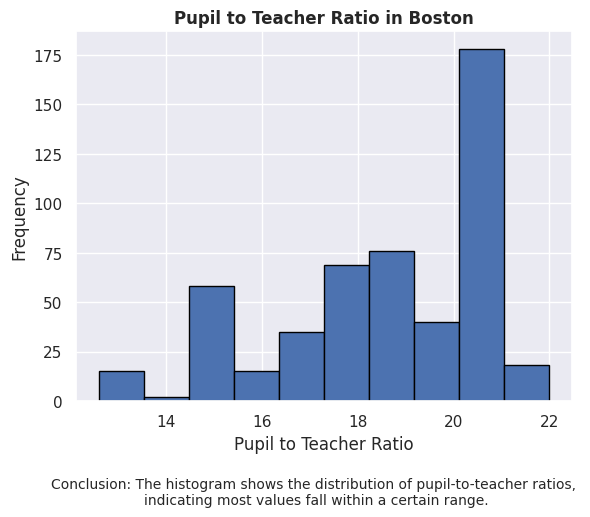

In [67]:
plt.hist(Viviendas['PTRATIO'], bins=10, edgecolor='black')
plt.title('Pupil to Teacher Ratio in Boston', weight='bold')
plt.xlabel('Pupil to Teacher Ratio')
plt.ylabel('Frequency')

### TASK 3: Use the appropriate tests to answer the questions provided. 

### Question 6: 
### Is there a significant difference in median value of houses bounded by the Charles river or not?

Hypothesis

Null Hypotesis (H0): There isn't significant difference in Median values of houses (MEDV) bounded by the Charles river 

Alternative Hypothesis (H1): There is significant difference in Median values of houses (MEDV) bounded by the Charles river 

In [115]:
t_statistic, p_value = stats.ttest_ind(Viviendas[Viviendas['CHAS'] == 1]['MEDV'],
                          Viviendas[Viviendas['CHAS'] == 0]['MEDV'])
print("F-Statistic: {0}, P-Value: {1}".format(t_statistic, p_value))

F-Statistic: 3.996437466090509, P-Value: 7.390623170519905e-05


In [ ]:
alpha = 0.05
if p_value < alpha: 
    print('Reject H0: There is signifficant difference in median values of houses bounded by the Charles river')
else: 
    print('Do not Reject H0: There is not signifficant difference in median values of housesç')

### Question 7: 
### Is there a difference in Median values of houses (MEDV) for each proportion of owner occupied units built prior to 1940 (AGE)? 

We create Age Groups

In [105]:
Menos35 = Viviendas[Viviendas['AGE'] < 35]['MEDV'] 
Entre35y70 = Viviendas[(Viviendas['AGE'] >= 35) & (Viviendas['AGE'] <= 70)]['MEDV']
Mas70 = Viviendas[Viviendas['AGE'] > 70]['MEDV']

Hypothesis

Null Hypotesis (H0): There isn't statistical difference in Median values of houses (MEDV) for each proportion of owner occpied units built prior to 1940

Alternative Hypothesis (H1): There is statistical difference in Median values of houses (MEDV) for each proportion of owner occpied units built prior to 1940

In [30]:
f_statistic, p_value = stats.f_oneway(Menos35, Entre35y70, Mas70)
print("F-Statistic: {0}, P-Value: {1}".format(f_statistic, p_value))

F-Statistic: 36.40764999196599, P-Value: 1.7105011022702984e-15


In [110]:
alpha = 0.05
if p_value < alpha: 
    print('Reject H0: There is signifficant difference in median values of houses for each proportion of owner occpied units built \nprior to 1940')
else: 
    print('Do not Reject H0: There is not signifficant difference in median values of houses for each proportion of owner occpied units built prior to 1940')

Reject H0: There is signifficant difference in median values of houses for each proportion of owner occpied units built 
prior to 1940


### Quiestion 8:  
### Can we conclude that there is no relationship between Nitric oxide concentrations and proportion of non-retail business acres per town?

Hypothesis

Null Hypotesis (H0): Nitric Oxide concentration isn't correlated with the proportion of non-retail business acres per town

Alternative Hypothesis (H1): Nitric Oxide concentration is correlated with the proportion of non-retail business acres per town

In [98]:
Pearson_Coeff, p_value = stats.pearsonr(Viviendas['NOX'], Viviendas['INDUS'])

print('Pearson Coeff',Pearson_Coeff)
print('P-Value', p_value)

Pearson Coeff 0.7636514469209192
P-Value 7.913361061210442e-98


In [102]:
alpha = 0.05
if p_value < alpha: 
    print('Reject H0: \nThere is a positive correlation between Nitric oxide concentration and proportion of non-retail business acres per town')
else: 
    print('Do not Reject H0: \nThere is not a correlation between de variables') 

Reject H0: 
There is a positive correlation between Nitric oxide concentration and proportion of non-retail business acres per town


### Quiestion 9:  
### What is the impact of an additional weighted distance  to the five Boston employment centres on the median value of owner occupied homes? 

Hypothesis

Null Hypotesis (H0): There isn't an impact on Median values (MEDV) of houses defined by their distance to the five Boston employment centers (DIS).

Alternative Hypothesis (H1): There is an impact on Median values (MEDV) of houses defined by their distance to the five Boston employment centers (DIS).

In [79]:
y = Viviendas['MEDV']
x = Viviendas['DIS']
x =sm.add_constant(x)
Model = sm.OLS(y,x).fit()
predictions = Model.predict()

In [81]:
print("\nRegression Analysis for Impact of Distance to Employment Centers on MEDV")
print(Model.summary())


Regression Analysis for Impact of Distance to Employment Centers on MEDV
                            OLS Regression Results                            
Dep. Variable:                   MEDV   R-squared:                       0.062
Model:                            OLS   Adj. R-squared:                  0.061
Method:                 Least Squares   F-statistic:                     33.58
Date:                Sun, 27 Oct 2024   Prob (F-statistic):           1.21e-08
Time:                        13:15:25   Log-Likelihood:                -1823.9
No. Observations:                 506   AIC:                             3652.
Df Residuals:                     504   BIC:                             3660.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------

In [104]:
alpha = 0.05
p_val = Model.pvalues['DIS']
if p_val < alpha:
    print("Reject H0: Distance has a significant impact on median values. \n\nThe coef DIS of 1.0916 indicates that an additional weighted distance to the 5 empolyment centers in boston increases of 1.0916 the median value of owner occupied homes")
else:
    print("Do not reject H0: Distance has no significant impact on median values.")


Reject H0: Distance has a significant impact on median values. 

The coef DIS of 1.0916 indicates that an additional weighted distance to the 5 empolyment centers in boston increases of 1.0916 the median value of owner occupied homes
